# **REKOMENDASI RUTE TEMPAT WISATA**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = '/content/tourism_with_id.csv'
place = pd.read_csv(url)
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
place = place.drop(['Unnamed: 11','Unnamed: 12','Time_Minutes','Coordinate'],axis=1)


In [ ]:
place = place[place['City']=='Surabaya']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
391,392,Ekowisata Mangrove Wonorejo,Hutan Wisata Mangrove Surabaya merupakan wisat...,Cagar Alam,Surabaya,0,4.3,-7.308648,112.821662
392,393,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,-7.295221,112.803560


In [ ]:
data = place[['Place_Id','Lat','Long','Place_Name','Rating']]
df = pd.DataFrame(data)
df['Coordinate'] = df.apply(lambda row: (row['Lat'], row['Long']), axis=1)
df.head(2)

,Place_Id,Lat,Long,Place_Name,Rating,Coordinate
391,392,-7.308648,112.821662,Ekowisata Mangrove Wonorejo,4.3,"(-7.3086482, 112.8216622)"
392,393,-7.295221,112.803560,Taman Harmoni Keputih,4.4,"(-7.2952211, 112.8035603)"


In [ ]:
data = place[['Place_Id','Lat','Long','Place_Name','Rating']]
df = pd.DataFrame(data)
df['Coordinate'] = df.apply(lambda row: (row['Lat'], row['Long']), axis=1)
df.head(2)

,Place_Id,Lat,Long,Place_Name,Rating,Coordinate
391,392,-7.308648,112.821662,Ekowisata Mangrove Wonorejo,4.3,"(-7.3086482, 112.8216622)"
392,393,-7.295221,112.803560,Taman Harmoni Keputih,4.4,"(-7.2952211, 112.8035603)"


In [ ]:
from geopy.distance import geodesic
df = df.reset_index(drop=True)

def hitung_jarak(row):
    if row.name > 0:
        prev_row = df.loc[row.name - 1]
        if isinstance(prev_row['Coordinate'], tuple) and isinstance(row['Coordinate'], tuple):
            return geodesic(prev_row['Coordinate'], row['Coordinate']).km
        else:
            return 0
    else:
        return 0
df['Jarak_Berurutan'] = df.apply(hitung_jarak, axis=1)
df.head()

,Place_Id,Lat,Long,Place_Name,Rating,Coordinate,Jarak_Berurutan
0,392,-7.308648,112.821662,Ekowisata Mangrove Wonorejo,4.3,"(-7.3086482, 112.8216622)",0.000000
1,393,-7.295221,112.803560,Taman Harmoni Keputih,4.4,"(-7.2952211, 112.8035603)",2.490074
2,394,-7.235693,112.795523,Air Mancur Menari,4.4,"(-7.2356933, 112.7955234)",6.642857
3,395,-7.261472,112.742828,Taman Prestasi,4.6,"(-7.2614722, 112.7428284)",6.480230
4,396,-7.265430,112.750305,Monumen Kapal Selam,4.4,"(-7.2654304, 112.7503052)",0.934541


In [ ]:
import itertools

distances = []
for pair in itertools.combinations(df[['Lat', 'Long', 'Place_Name']].values, 2):
    distance = geodesic(pair[0][:2], pair[1][:2]).km
    distances.append((pair[0][2], pair[1][2], distance))

# Display the distances on the plot
for distance in distances:
  print(f"Distance between Place {distance[0]} and {distance[1]}: {distance[2]:.2f} km")

Distance between Place Ekowisata Mangrove Wonorejo and Taman Harmoni Keputih: 2.49 km
Distance between Place Ekowisata Mangrove Wonorejo and Air Mancur Menari: 8.57 km
Distance between Place Ekowisata Mangrove Wonorejo and Taman Prestasi: 10.15 km
Distance between Place Ekowisata Mangrove Wonorejo and Monumen Kapal Selam: 9.22 km
Distance between Place Ekowisata Mangrove Wonorejo and Taman Kunang-Kunang: 4.27 km
Distance between Place Ekowisata Mangrove Wonorejo and Taman Buah Surabaya: 5.52 km
Distance between Place Ekowisata Mangrove Wonorejo and Taman Pelangi: 10.20 km
Distance between Place Ekowisata Mangrove Wonorejo and Hutan Bambu Keputih: 2.72 km
Distance between Place Ekowisata Mangrove Wonorejo and Taman Keputran: 9.42 km
Distance between Place Ekowisata Mangrove Wonorejo and Food Junction Grand Pakuwon: 18.75 km
Distance between Place Ekowisata Mangrove Wonorejo and Taman Barunawati: 13.78 km
Distance between Place Ekowisata Mangrove Wonorejo and Kenjeran Park: 6.81 km
Dista

In [28]:
G = nx.Graph()

for pair in itertools.combinations(df[['Lat', 'Long', 'Place_Name']].values, 2):
    distance = geodesic(pair[0][:2], pair[1][:2]).km
    place1, place2 = pair[0][2], pair[1][2]

    G.add_edge(place1, place2, weight=distance)

**DJIKSTRA**

Recommended path from Ekowisata Mangrove Wonorejo to Museum Sepuluh Nopember Kota Surabaya: ['Ekowisata Mangrove Wonorejo', 'Taman Harmoni Keputih', 'Hutan Bambu Keputih', 'Masjid Muhammad Cheng Hoo', 'Museum Sepuluh Nopember Kota Surabaya']
Total distance: 11.60 km
Running time: 26.764452 seconds


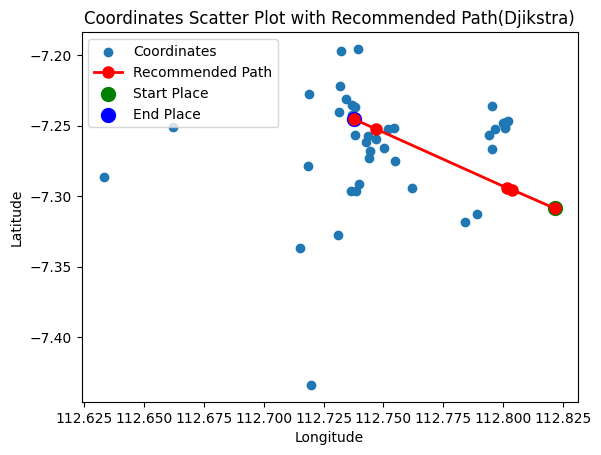

In [82]:
import networkx as nx
import itertools
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import itertools
import time

def find_recommended_path(graph, start, end, max_places):
    recommended_paths = []
    min_distance = float('inf')
    all_combinations = [comb for comb in itertools.combinations(graph.nodes(), max_places) if start in comb and end in comb]

    for places_to_visit in all_combinations:
        total_distance = sum(nx.shortest_path_length(graph, source=places_to_visit[i], target=places_to_visit[i + 1], weight='weight', method='dijkstra') for i in range(len(places_to_visit) - 1))
        if total_distance < min_distance:
            min_distance = total_distance
            recommended_paths = list(places_to_visit)


    return recommended_paths, min_distance

def measure_running_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    running_time = end_time - start_time
    return result, running_time

start_place = "Ekowisata Mangrove Wonorejo"
end_place = 'Museum Sepuluh Nopember Kota Surabaya'
max_places_to_visit = 5



result, running_time = measure_running_time(find_recommended_path, G, start_place, end_place, max_places_to_visit)

recommended_paths, total_distance = result
if recommended_paths:
    print(f"Recommended path from {start_place} to {end_place}: {recommended_paths}")
    print(f"Total distance: {total_distance:.2f} km")
    print(f"Running time: {running_time:.6f} seconds")
else:
    print(f"No path found from {start_place} to {end_place} with the given constraints.")


plt.scatter(df['Long'], df['Lat'], label='Coordinates')

recommended_coordinates = df[df['Place_Name'].isin(recommended_paths)]
plt.plot(recommended_coordinates['Long'], recommended_coordinates['Lat'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Recommended Path')


start_coordinates = df[df['Place_Name'] == start_place]
end_coordinates = df[df['Place_Name'] == end_place]
plt.scatter(start_coordinates['Long'], start_coordinates['Lat'], color='green', marker='o', s=100, label='Start Place')
plt.scatter(end_coordinates['Long'], end_coordinates['Lat'], color='blue', marker='o', s=100, label='End Place')

plt.legend()


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates Scatter Plot with Recommended Path(Djikstra)')
plt.show()



**BELLMAN-FORD**

Recommended path from Ekowisata Mangrove Wonorejo to Museum Sepuluh Nopember Kota Surabaya: ['Ekowisata Mangrove Wonorejo', 'Taman Harmoni Keputih', 'Air Mancur Menari', 'Taman Prestasi', 'Museum Sepuluh Nopember Kota Surabaya']
Total distance: 11.59 km
Running time: 7.952974 seconds


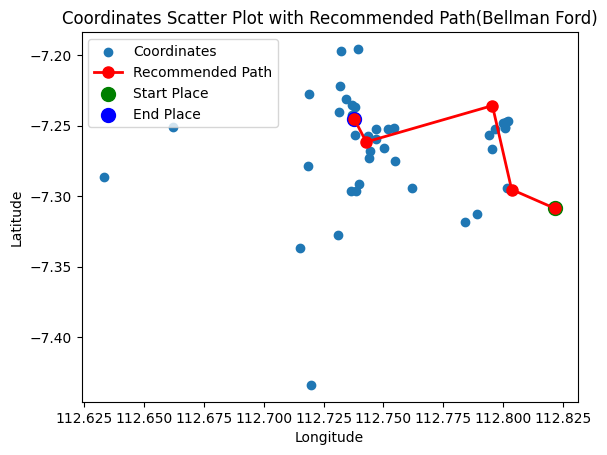

In [75]:
import networkx as nx
import itertools
from geopy.distance import geodesic
import time

def bellman_ford(graph, start, end):
    distances = {node: float('inf') for node in graph.nodes()}
    predecessors = {node: None for node in graph.nodes()}
    distances[start] = 0

    for _ in range(len(graph.nodes()) - 1):
        for edge in graph.edges(data=True):
            source, target, weight = edge[0], edge[1], edge[2]['weight']
            if distances[source] + weight < distances[target]:
                distances[target] = distances[source] + weight
                predecessors[target] = source


    for edge in graph.edges(data=True):
        source, target, weight = edge[0], edge[1], edge[2]['weight']
        if distances[source] + weight < distances[target]:
            raise ValueError("Graph contains a negative cycle")

    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = predecessors[current]

    return path, distances[end]

G = nx.Graph()
for pair in itertools.combinations(df[['Lat', 'Long', 'Place_Name']].values, 2):
    distance = geodesic(pair[0][:2], pair[1][:2]).km
    place1, place2 = pair[0][2], pair[1][2]
    G.add_edge(place1, place2, weight=distance)


def measure_running_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    running_time = end_time - start_time
    return result, running_time


def find_recommended_path(graph, start, end, max_places):
    recommended_paths = []
    min_distance = float('inf')
    all_combinations = [comb for comb in itertools.combinations(graph.nodes(), max_places) if start in comb and end in comb]

    for places_to_visit in all_combinations:
        try:
            total_distance = bellman_ford(graph.subgraph(places_to_visit), start, end)[1]
            if total_distance < min_distance:
                min_distance = total_distance
                recommended_paths = list(places_to_visit)
        except ValueError:
            pass  # Ignore negative cycles

    return recommended_paths, min_distance

start_place = "Ekowisata Mangrove Wonorejo"
end_place = "Museum Sepuluh Nopember Kota Surabaya"
max_places_to_visit = 5

result, running_time = measure_running_time(find_recommended_path, G, start_place, end_place, max_places_to_visit)

recommended_paths, total_distance = result
if recommended_paths:
    print(f"Recommended path from {start_place} to {end_place}: {recommended_paths}")
    print(f"Total distance: {total_distance:.2f} km")
    print(f"Running time: {running_time:.6f} seconds")
else:
    print(f"No path found from {start_place} to {end_place} with the given constraints.")

plt.scatter(df['Long'], df['Lat'], label='Coordinates')

recommended_coordinates = df[df['Place_Name'].isin(recommended_paths)]
plt.plot(recommended_coordinates['Long'], recommended_coordinates['Lat'], color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Recommended Path')


start_coordinates = df[df['Place_Name'] == start_place]
end_coordinates = df[df['Place_Name'] == end_place]
plt.scatter(start_coordinates['Long'], start_coordinates['Lat'], color='green', marker='o', s=100, label='Start Place')
plt.scatter(end_coordinates['Long'], end_coordinates['Lat'], color='blue', marker='o', s=100, label='End Place')

plt.legend()


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates Scatter Plot with Recommended Path(Bellman Ford)')
plt.show()
